# Mushrooms

##### Realise en python 3 avec sklearn (Mushrooms dataset)
 - Importation bibliotheque
 - Traitement et preparation des donnees
 - Creation d'un modele lineaire, apprentissage et evaluation sur le jeu de donnees
 - Creation d'un modele de regression logistique, apprentissage et evaluation sur le jeu de donnees
 - Creation d'un modele d'arbre de decision, apprentissage et evaluation sur le jeu de donnees
 - Creation d'un modele de support vecteur, apprentissage et evaluation sur le jeu de donnees
 - Creation d'un modele de perceptron simple, apprentissage et evaluation sur le jeu de donnees
 - Creation d'un modele de perceptron multi-couche, apprentissage et evaluation sur le jeu de donnees

In [3]:
# importatation des bibliotheques

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

import graphviz
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# Mode interactif pour faciliter l'utilisation de figures multiples
plt.ion

<function matplotlib.pyplot.ion()>

In [5]:
# importation de mon jeu de donnees en utilisant pandas

df_mushrooms = pd.read_csv('data/df_mushrooms.csv', delimiter = ';')
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Listes des colonnes de mon jeu de donnees
df_mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
# J'enleve le premier colonne "class" de mon data frame data et je l'ajoute dans une variable target
labels = df_mushrooms['class']
data = df_mushrooms.drop('class',axis=1)
#labels.head()
target = labels.head()
print(target)

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


In [8]:
# J'affiche les cinq premieres lignes de mon nouveau df stoke dans la variable data sans la colonne "class"
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [360]:
# J'affiche le type des attributs
data.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [361]:
# Je cree une variable "encoder" pour stocker l'encodage des colonnes de mon df
encoder = LabelEncoder()
for i in data.columns:
    data[i]=encoder.fit_transform(data[i])

In [362]:
data=data.drop(["veil-type"],axis=1)

In [363]:
# Je reaffiche mon df stocker dans la variable "data", mais cette fois sans la colonne "class"
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [364]:
# J'affiche a nouveau les attributs et leurs types
data.dtypes

cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

### Modele lineaire

In [365]:
# Découpage des données en jeu d’apprentissage et jeu de test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=40)
print(len(X_train),'données d\'apprentissage')
print(len(X_test),'données de test')

5443 données d'apprentissage
2681 données de test


In [366]:
# Creation et apprentissage du modele lineaire
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [367]:
# 1ere facon
# Les scores du modele
ldaScore_train = "%.3f" % lda.score(X_train, y_train)
ldaScore_test = "%.3f" % lda.score(X_test, y_test)


print("Train:",ldaScore_train)
print("Test:",ldaScore_test)

Train: 0.947
Test: 0.943


In [368]:
# 2eme facon
# Accuracy sur l'ensemble d'apprentissage et de test
lda_train_acc = "%.3f" % accuracy_score(y_train, lda.predict(X_train))
lda_test_acc = "%.3f" % accuracy_score(y_test, lda.predict(X_test))

# lda_predict=lr_model.predict(X_test1)

print("Accuracy train: ", lda_train_acc)
print("Accuracy test: ", lda_test_acc)
# print("Accuracy test : "+str(accuracy_score(y_test1,lda_predict)))

Accuracy train:  0.947
Accuracy test:  0.943


In [369]:
# Autres mesures d'evaluation 

lda_eval = precision_recall_fscore_support(y_train,lda.predict(X_train),average=None)
print("Train")
print("  - Precision 0", lda_eval[0][0].round(3))
print("  - Precision 1", lda_eval[0][1].round(3))
print("  - Recall 0", lda_eval[1][0].round(3))
print("  - Recall 1", lda_eval[1][1].round(3))
print("  - F-mesure 0", lda_eval[2][0].round(3))
print("  - F-mesure 1", lda_eval[2][1].round(3))
lda_eval = precision_recall_fscore_support(y_test,lda.predict(X_test),average=None)
print("Test")
print("  - Precision 0", lda_eval[0][0].round(3))
print("  - Precision 1", lda_eval[0][1].round(3))
print("  - Recall 0", lda_eval[1][0].round(3))
print("  - Recall 1", lda_eval[1][1].round(3))
print("  - F-mesure 0", lda_eval[2][0].round(3))
print("  - F-mesure 1", lda_eval[2][1].round(3))

Train
  - Precision 0 0.939
  - Precision 1 0.957
  - Recall 0 0.962
  - Recall 1 0.932
  - F-mesure 0 0.95
  - F-mesure 1 0.944
Test
  - Precision 0 0.934
  - Precision 1 0.953
  - Recall 0 0.956
  - Recall 1 0.929
  - F-mesure 0 0.945
  - F-mesure 1 0.941


### Regression logistique

In [370]:
# Decoupage des donnees (test set and train set)
X_train1,X_test1,y_train1,y_test1 = train_test_split(data,labels,test_size=0.33,random_state=40)

print(len(X_train1),'données d\'apprentissage')
print(len(X_test1),'données de test')

5443 données d'apprentissage
2681 données de test


In [371]:
# Creation et apprentissage du model de regression logistique
lr_model = LogisticRegression()
lr_model.fit(X_train1,y_train1)

/home/sinatechnologie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [375]:
# 1ere facon
# Les scores du modele
lrScore_train1 = "%.3f" % lr_model.score(X_train1, y_train1)
lrScore_test1 = "%.3f" % lr_model.score(X_test1, y_test1)

print("Train: ",lrScore_train1)
print("Test: ",lrScore_test1)

Train:  0.953
Test:  0.950


In [374]:
# Autres facon
# Accuracy du modele
lr_train_acc = "%.3f" % accuracy_score(y_train1, lr_model.predict(X_train1))
lr_test_acc = "%.3f" % accuracy_score(y_test1, lr_model.predict(X_test1))

# lda_predict=lr_model.predict(X_test1)

print("Accuracy train: ", lr_train_acc)
print("Accuracy test: ", lr_test_acc)

Accuracy train:  0.953
Accuracy test:  0.950


In [376]:
# Autres mesures d'évaluation

lr_eval1 = precision_recall_fscore_support(y_train1,lr_model.predict(X_train1),average=None)
print("Train")
print("  - Precision 0", lr_eval1[0][0].round(3))
print("  - Precision 1", lr_eval1[0][1].round(3))
print("  - Recall 0", lr_eval1[1][0].round(3))
print("  - Recall 1", lr_eval1[1][1].round(3))
print("  - F-mesure 0", lr_eval1[2][0].round(3))
print("  - F-mesure 1", lr_eval1[2][1].round(3))
lr_eval1 = precision_recall_fscore_support(y_test1,lr_model.predict(X_test1),average=None)
print("Test")
print("  - Precision 0", lr_eval1[0][0].round(3))
print("  - Precision 1", lr_eval1[0][1].round(3))
print("  - Recall 0", lr_eval1[1][0].round(3))
print("  - Recall 1", lr_eval1[1][1].round(3))
print("  - F-mesure 0", lr_eval1[2][0].round(3))
print("  - F-mesure 1", lr_eval1[2][1].round(3))

Train
  - Precision 0 0.95
  - Precision 1 0.956
  - Recall 0 0.96
  - Recall 1 0.944
  - F-mesure 0 0.955
  - F-mesure 1 0.95
Test
  - Precision 0 0.948
  - Precision 1 0.952
  - Recall 0 0.955
  - Recall 1 0.945
  - F-mesure 0 0.951
  - F-mesure 1 0.949


### Modele abre de decision

In [377]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(data,labels,test_size=0.3,random_state=40)

In [378]:
# Creation du modele d'abre de decision
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [379]:
dtScore_train = "%.3f" % dt_model.score(X_train2, y_train2)
dtScore_test = "%.3f" % dt_model.score(X_test2, y_test2)

print("Train ", dtScore_train)
print("Test ", dtScore_test)

Train  1.000
Test  1.000


In [380]:
dt_train_predict = dt_model.predict(X_train2)
dt_test_predict= dt_model.predict(X_test2)
print("Train accuracy: "+str(accuracy_score(y_train2, dt_train_predict)))
print("Test accuracy: "+str(accuracy_score(y_test2, dt_test_predict)))

Train accuracy: 1.0
Test accuracy: 1.0


[Text(145.56521739130434, 203.85, 'X[8] <= 3.5\ngini = 0.499\nsamples = 5686\nvalue = [2960, 2726]'),
 Text(72.78260869565217, 176.67000000000002, 'X[19] <= 3.5\ngini = 0.287\nsamples = 2323\nvalue = [404, 1919]'),
 Text(29.11304347826087, 149.49, 'X[18] <= 1.5\ngini = 0.2\nsamples = 427\nvalue = [379, 48]'),
 Text(14.556521739130435, 122.31, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(43.66956521739131, 122.31, 'X[7] <= 0.5\ngini = 0.059\nsamples = 391\nvalue = [379, 12]'),
 Text(29.11304347826087, 95.13, 'gini = 0.0\nsamples = 379\nvalue = [379, 0]'),
 Text(58.22608695652174, 95.13, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(116.45217391304348, 149.49, 'X[10] <= 2.0\ngini = 0.026\nsamples = 1896\nvalue = [25, 1871]'),
 Text(101.89565217391305, 122.31, 'X[12] <= 0.5\ngini = 0.007\nsamples = 1878\nvalue = [7, 1871]'),
 Text(87.33913043478262, 95.13, 'X[1] <= 2.5\ngini = 0.465\nsamples = 19\nvalue = [7, 12]'),
 Text(72.78260869565217, 67.94999999999999, 'gini = 0.0\nsam

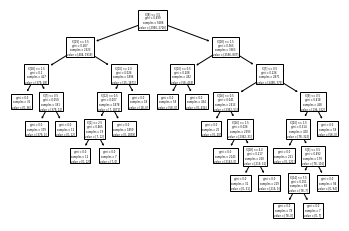

In [381]:
tree.plot_tree(dt_model)

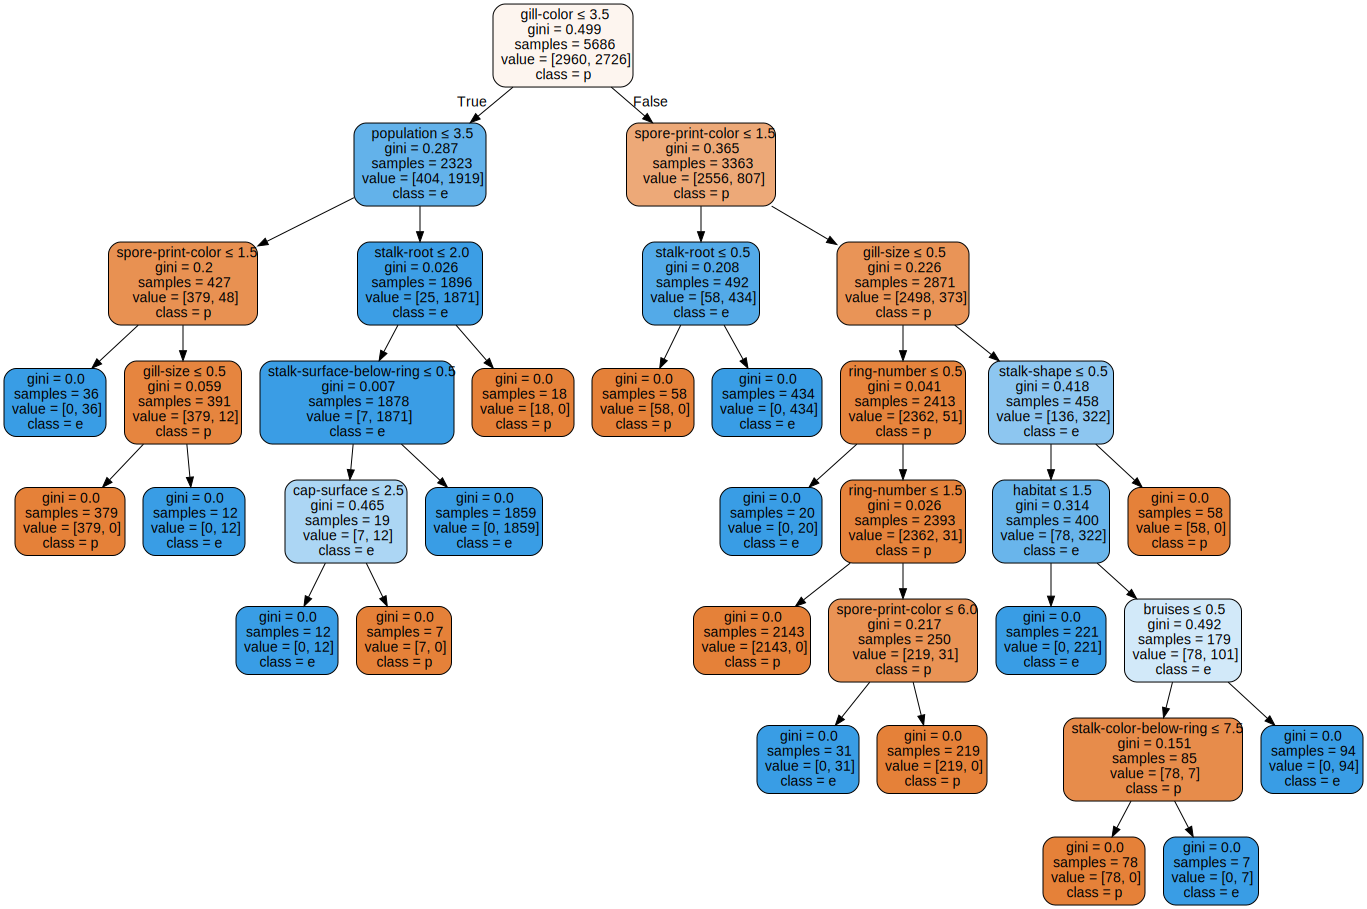

In [382]:
dot_data = export_graphviz(dt_model, out_file=None, 
                         feature_names=data.columns,
                         class_names=target,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("mushrooms") 
graph 

In [383]:
# Autres mesures d'évaluation

dt_eval2 = precision_recall_fscore_support(y_train2,dt_model.predict(X_train2),average=None)
print("Train")
print("  - Precision 0", dt_eval2[0][0].round(3))
print("  - Precision 1", dt_eval2[0][1].round(3))
print("  - Recall 0", dt_eval2[1][0].round(3))
print("  - Recall 1", dt_eval2[1][1].round(3))
print("  - F-mesure 0", dt_eval2[2][0].round(3))
print("  - F-mesure 1", dt_eval2[2][1].round(3))
dt_eval2 = precision_recall_fscore_support(y_test2,dt_model.predict(X_test2),average=None)
print("Test")
print("  - Precision 0", dt_eval2[0][0].round(3))
print("  - Precision 1", dt_eval2[0][1].round(3))
print("  - Recall 0", dt_eval2[1][0].round(3))
print("  - Recall 1", dt_eval2[1][1].round(3))
print("  - F-mesure 0", dt_eval2[2][0].round(3))
print("  - F-mesure 1", dt_eval2[2][1].round(3))

Train
  - Precision 0 1.0
  - Precision 1 1.0
  - Recall 0 1.0
  - Recall 1 1.0
  - F-mesure 0 1.0
  - F-mesure 1 1.0
Test
  - Precision 0 1.0
  - Precision 1 1.0
  - Recall 0 1.0
  - Recall 1 1.0
  - F-mesure 0 1.0
  - F-mesure 1 1.0


### Modele Perceptron Simple

In [394]:
# Creation et apprentissage d'un modele perceptron 
mp_model = Perceptron(tol=1e-3, random_state=0)
mp_model.fit(X_train2, y_train2)

Perceptron()

In [395]:
# 1ere facon
# Les scores du modele perceptron
mpScore_train = "%.3f" % mp_model.score(X_train2, y_train2)
mpScore_test = "%.3f" % mp_model.score(X_test2, y_test2)

print("Train: ", mpScore_train)
print("Test: ", mpScore_test)

Train:  0.928
Test:  0.926


In [396]:
# 2eme facon
# Accuracy du modele perceptron (apprentissage et test)
mp_train_predict = mp_model.predict(X_train2)
mp_test_predict= mp_model.predict(X_test2)
print("Train accuracy: "+str(accuracy_score(y_train2, mp_train_predict)))
print("Test accuracy: "+str(accuracy_score(y_test2, mp_test_predict)))

Train accuracy: 0.9277172001406965
Test accuracy: 0.92616899097621


In [397]:
# Autres mesures d'évaluation

mp_eval3 = precision_recall_fscore_support(y_train2,mp_model.predict(X_train2),average=None)
print("Train")
print("  - Precision 0", mp_eval3[0][0].round(3))
print("  - Precision 1", mp_eval3[0][1].round(3))
print("  - Recall 0", mp_eval3[1][0].round(3))
print("  - Recall 1", mp_eval3[1][1].round(3))
print("  - F-mesure 0", mp_eval3[2][0].round(3))
print("  - F-mesure 1", mp_eval3[2][1].round(3))
mp_eval3 = precision_recall_fscore_support(y_test2,mp_model.predict(X_test2),average=None)
print("Test")
print("  - Precision 0", mp_eval3[0][0].round(3))
print("  - Precision 1", mp_eval3[0][1].round(3))
print("  - Recall 0", mp_eval3[1][0].round(3))
print("  - Recall 1", mp_eval3[1][1].round(3))
print("  - F-mesure 0", mp_eval3[2][0].round(3))
print("  - F-mesure 1", mp_eval3[2][1].round(3))

Train
  - Precision 0 0.9
  - Precision 1 0.963
  - Recall 0 0.969
  - Recall 1 0.883
  - F-mesure 0 0.933
  - F-mesure 1 0.921
Test
  - Precision 0 0.905
  - Precision 1 0.952
  - Recall 0 0.957
  - Recall 1 0.894
  - F-mesure 0 0.93
  - F-mesure 1 0.922


### Modele Perceptron multi-couche 

In [398]:
# Creation et apprentissage d'un modele MLP
mlp_model = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
                          beta_2=0.999, early_stopping=False, epsilon=1e-08,
                          hidden_layer_sizes=(100,), learning_rate='constant',
                          learning_rate_init=0.001, max_iter=200, momentum=0.9,
                          n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                          random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
                          validation_fraction=0.1, verbose=False, warm_start=False)
mlp_model.fit(X_train2, y_train2)

MLPClassifier(alpha=1e-05, solver='lbfgs')

In [399]:
# Les scores du model
mlpScore_train = "%.3f" % dt_model.score(X_train2, y_train2)
mlpScore_test = "%.3f" % dt_model.score(X_test2, y_test2)

print("Train ", mlpScore_train)
print("Test ", mlpScore_test)

Train  1.000
Test  1.000


In [400]:
# Prediction sur le jeu test (metric:accuracy)
mlp_predict = mlp_model.predict(X_test2)
print("Accuracy : "+str(accuracy_score(y_test2, mlp_predict)))

Accuracy : 0.9971287940935193


In [401]:
# Autres mesures d'évaluation

mlp_eval3 = precision_recall_fscore_support(y_train2,mlp_model.predict(X_train2),average=None)
print("Train")
print("  - Precision 0", mlp_eval3[0][0].round(3))
print("  - Precision 1", mlp_eval3[0][1].round(3))
print("  - Recall 0", mlp_eval3[1][0].round(3))
print("  - Recall 1", mlp_eval3[1][1].round(3))
print("  - F-mesure 0", mlp_eval3[2][0].round(3))
print("  - F-mesure 1", mlp_eval3[2][1].round(3))
mlp_eval3 = precision_recall_fscore_support(y_test2,mlp_model.predict(X_test2),average=None)
print("Test")
print("  - Precision 0", mlp_eval3[0][0].round(3))
print("  - Precision 1", mlp_eval3[0][1].round(3))
print("  - Recall 0", mlp_eval3[1][0].round(3))
print("  - Recall 1", mlp_eval3[1][1].round(3))
print("  - F-mesure 0", mlp_eval3[2][0].round(3))
print("  - F-mesure 1", mlp_eval3[2][1].round(3))

Train
  - Precision 0 1.0
  - Precision 1 1.0
  - Recall 0 1.0
  - Recall 1 1.0
  - F-mesure 0 1.0
  - F-mesure 1 1.0
Test
  - Precision 0 0.996
  - Precision 1 0.998
  - Recall 0 0.998
  - Recall 1 0.996
  - F-mesure 0 0.997
  - F-mesure 1 0.997
